In [1]:
import numpy as np
from scipy.stats import binned_statistic
import dictionaries
import pandas
import matplotlib.pyplot as plt
import luminosities_magnitudes_and_distances as lmd
% matplotlib notebook

plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18

data = pandas.read_csv('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/nsa_debiased_one_to_one_bin.csv')

<IPython.core.display.Javascript object>


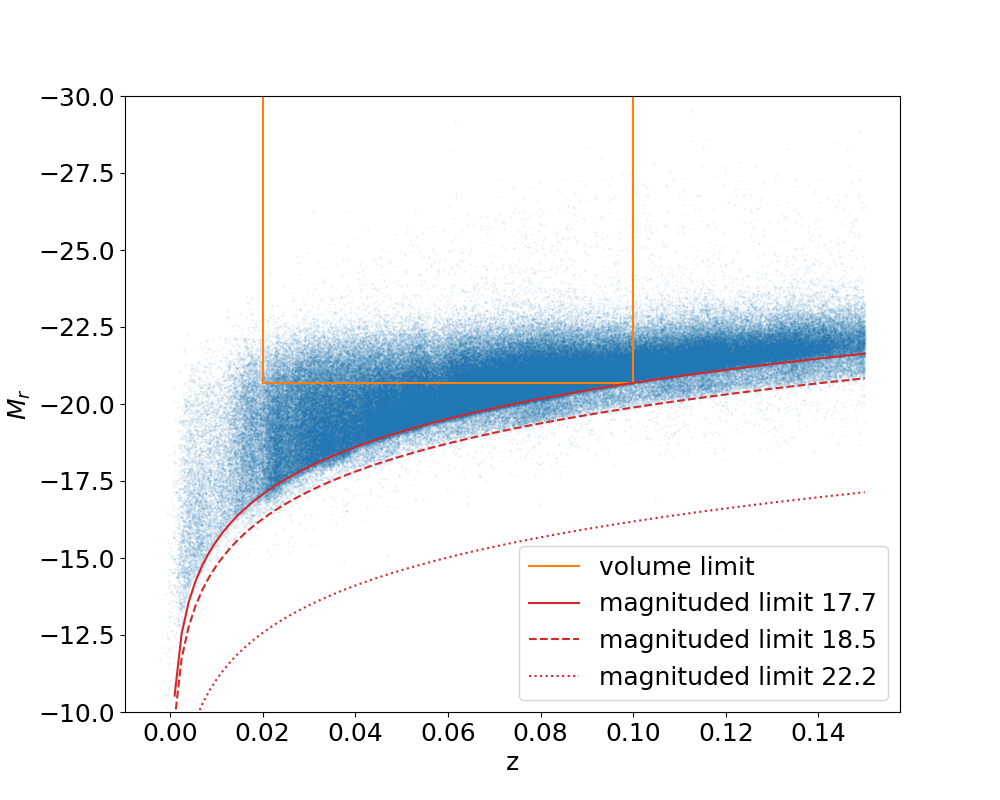

88685


In [2]:
z_limit = [0.02, 0.10]
Mag_limit = lmd.mag_to_Mag(17.7, z_limit[1])

z = np.linspace(0.001, data.z.max(), 100)
mag_limit_survey_1 = lmd.mag_to_Mag(17.7, z)
mag_limit_survey_2 = lmd.mag_to_Mag(18.5, z)
mag_limit_survey_3 = lmd.mag_to_Mag(22.2, z)

data.columns
plt.figure(0)
plt.plot(data.z, data.r_mag, '.', ms=1, alpha=0.1, label='_nolegend_')
plt.plot([z_limit[0], z_limit[1]], [Mag_limit, Mag_limit], color='C1')
plt.plot([z_limit[1], z_limit[1]], [Mag_limit, -30], color='C1')
plt.plot([z_limit[0], z_limit[0]], [Mag_limit, -30], color='C1', label='volume limit')
plt.plot(z, mag_limit_survey_1, color='C3', ls='-', label='magnituded limit 17.7')
plt.plot(z, mag_limit_survey_2, color='C3', ls='--', label='magnituded limit 18.5')
plt.plot(z, mag_limit_survey_3, color='C3', ls=':', label='magnituded limit 22.2')
plt.ylim(-10, -30)
plt.xlabel('z')
plt.ylabel(r'$M_r$')
plt.legend()
# plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/volume_limit.png')

volume_limit = (data.z < z_limit[1]) & (data.z > z_limit[0]) & (data.r_mag < Mag_limit)
print(volume_limit.sum())

<IPython.core.display.Javascript object>


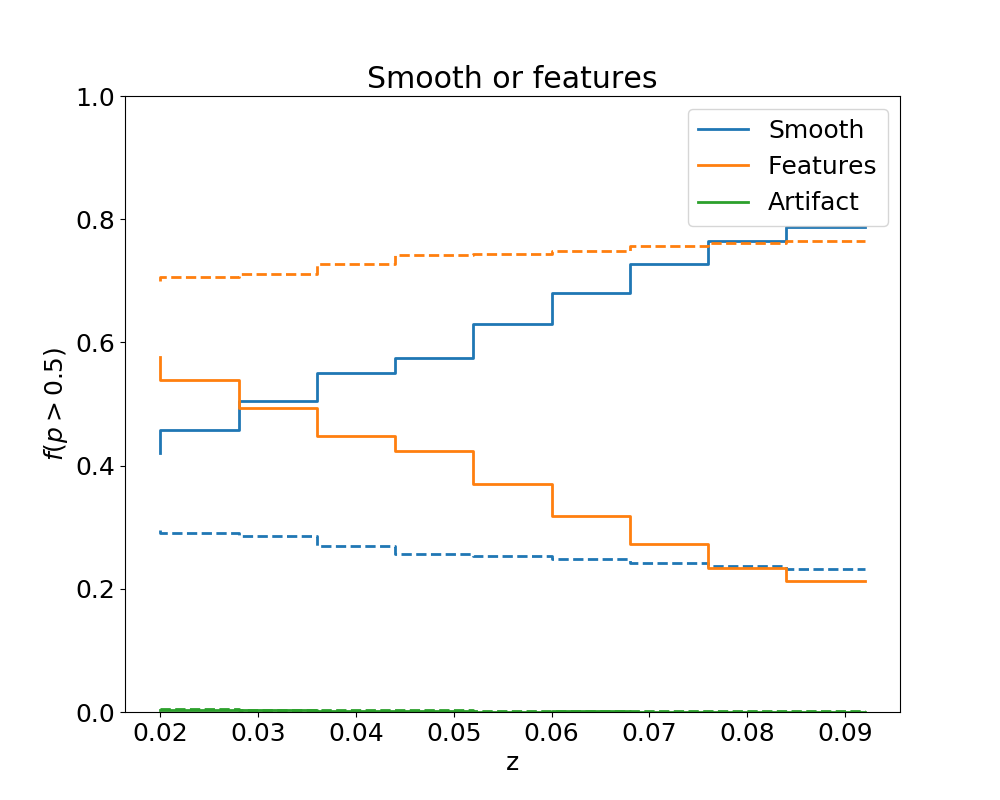

<IPython.core.display.Javascript object>


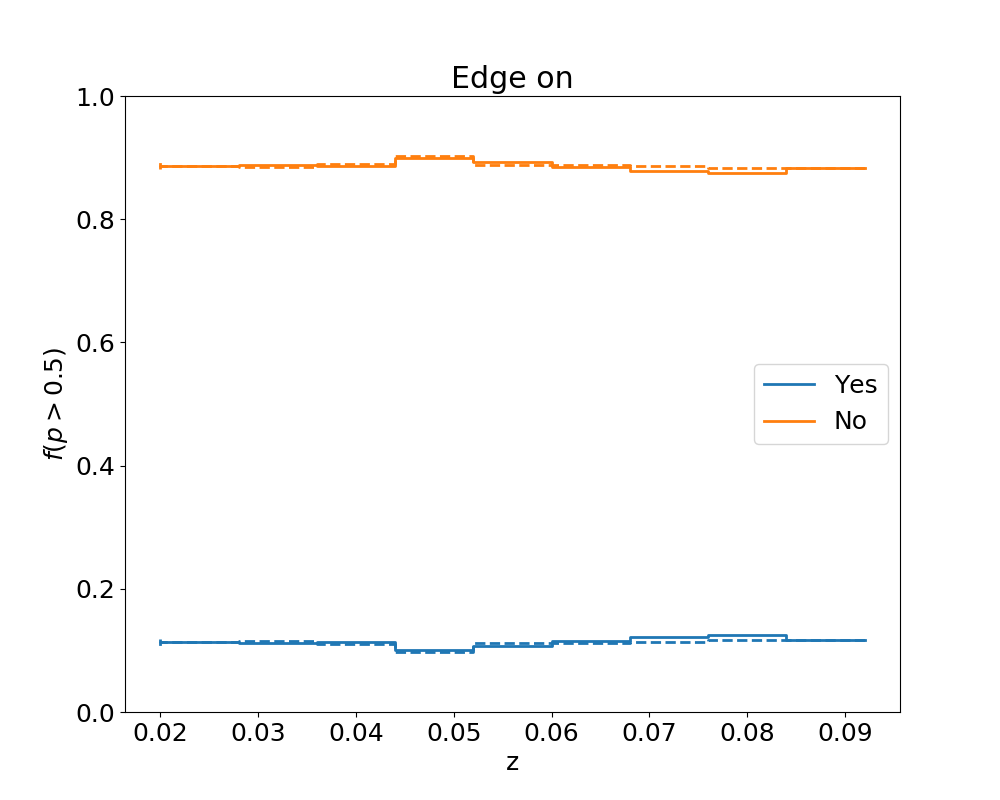

<IPython.core.display.Javascript object>


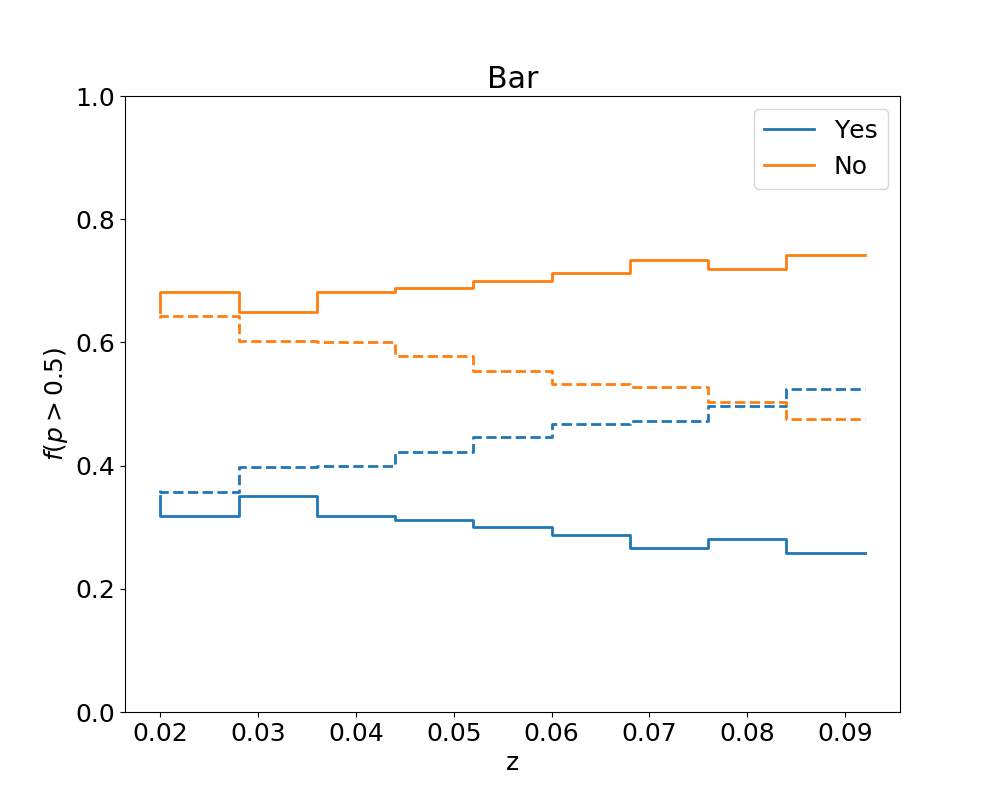

<IPython.core.display.Javascript object>


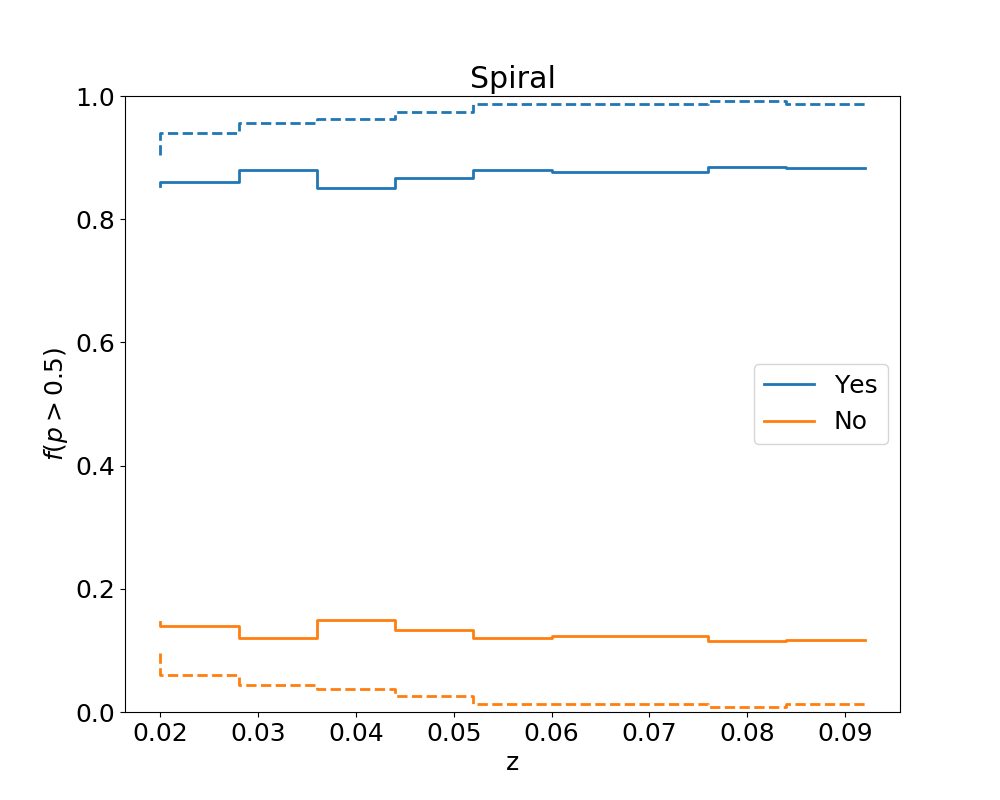

<IPython.core.display.Javascript object>


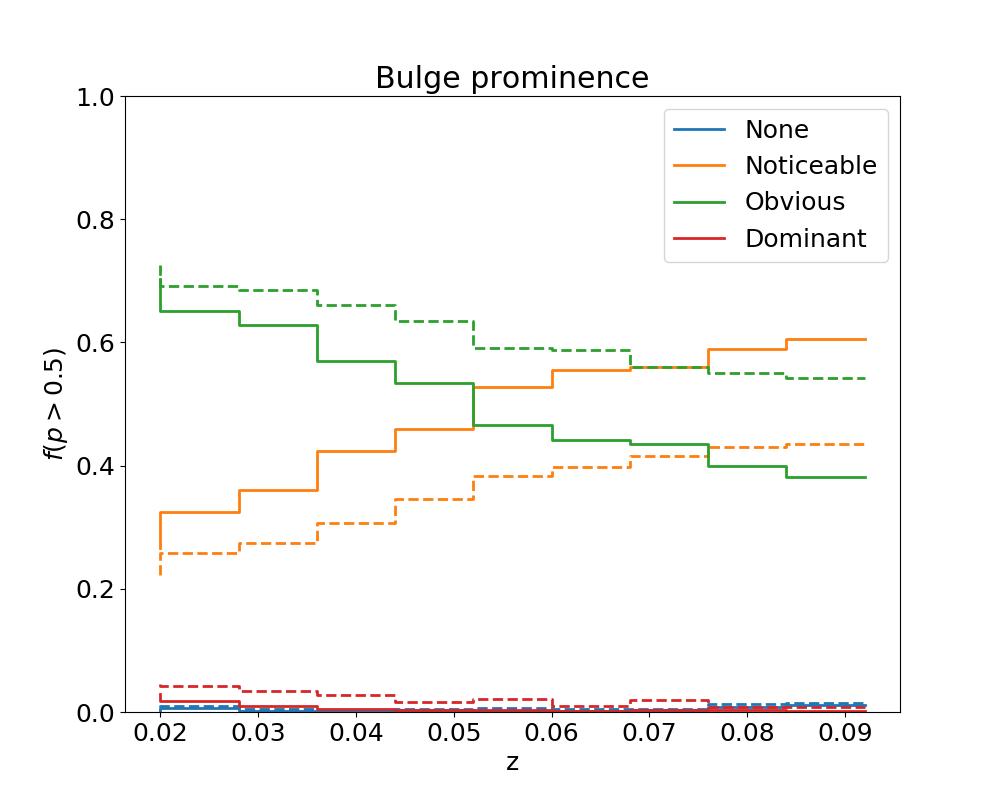

<IPython.core.display.Javascript object>


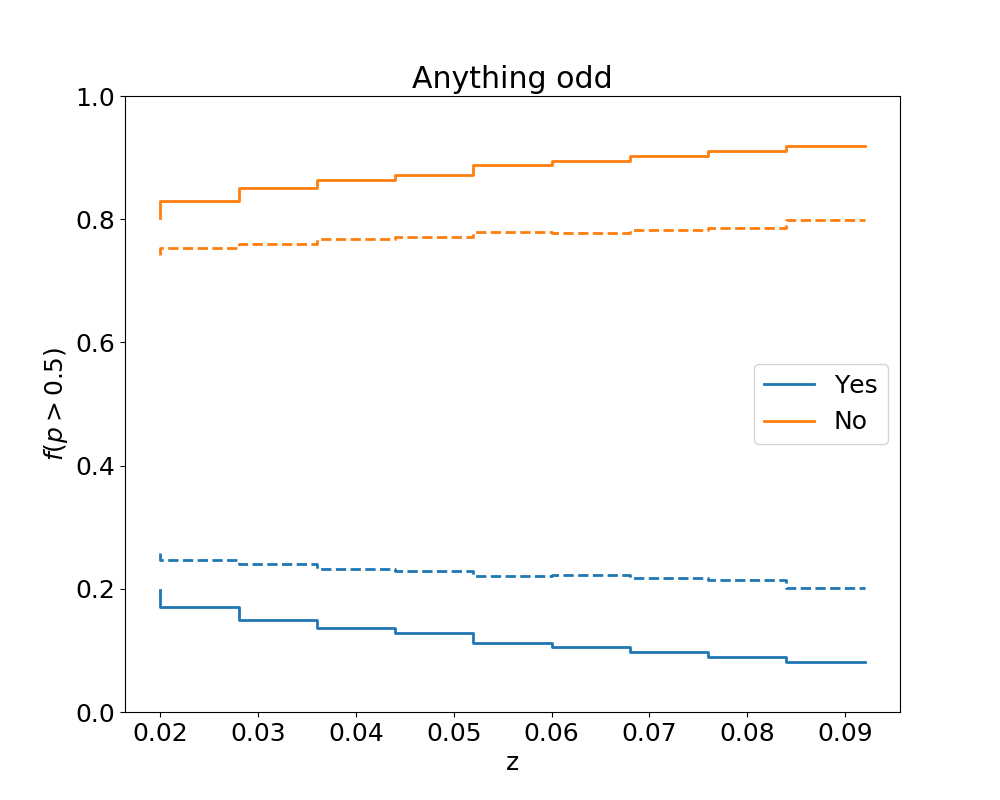

<IPython.core.display.Javascript object>


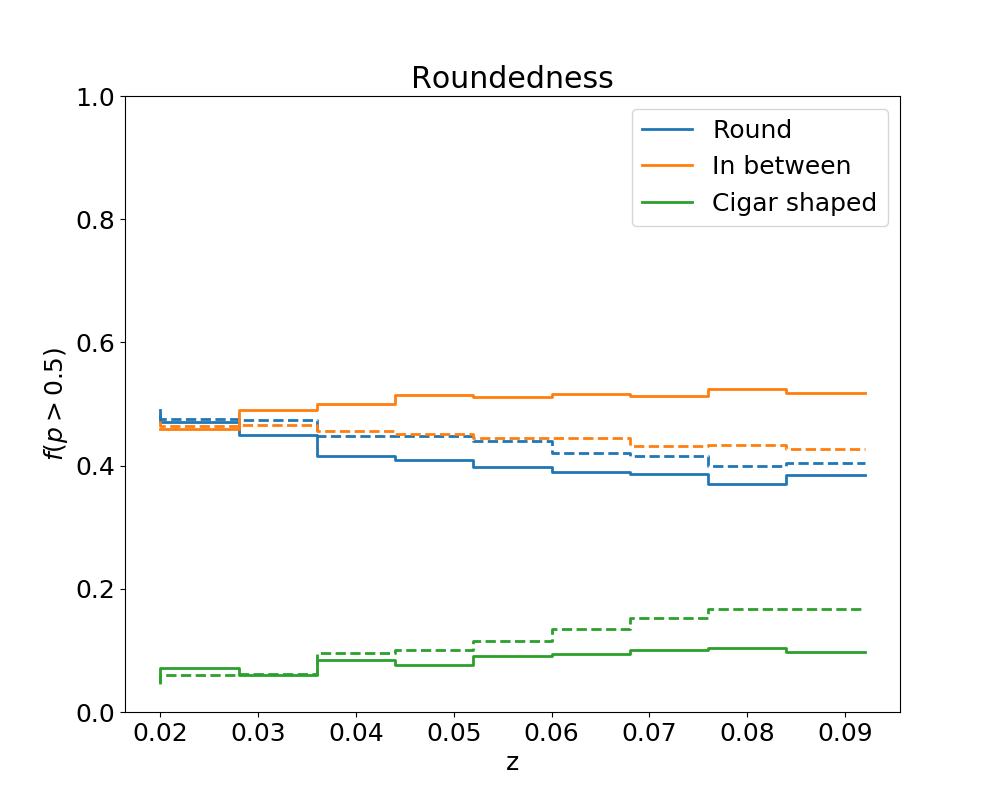

<IPython.core.display.Javascript object>


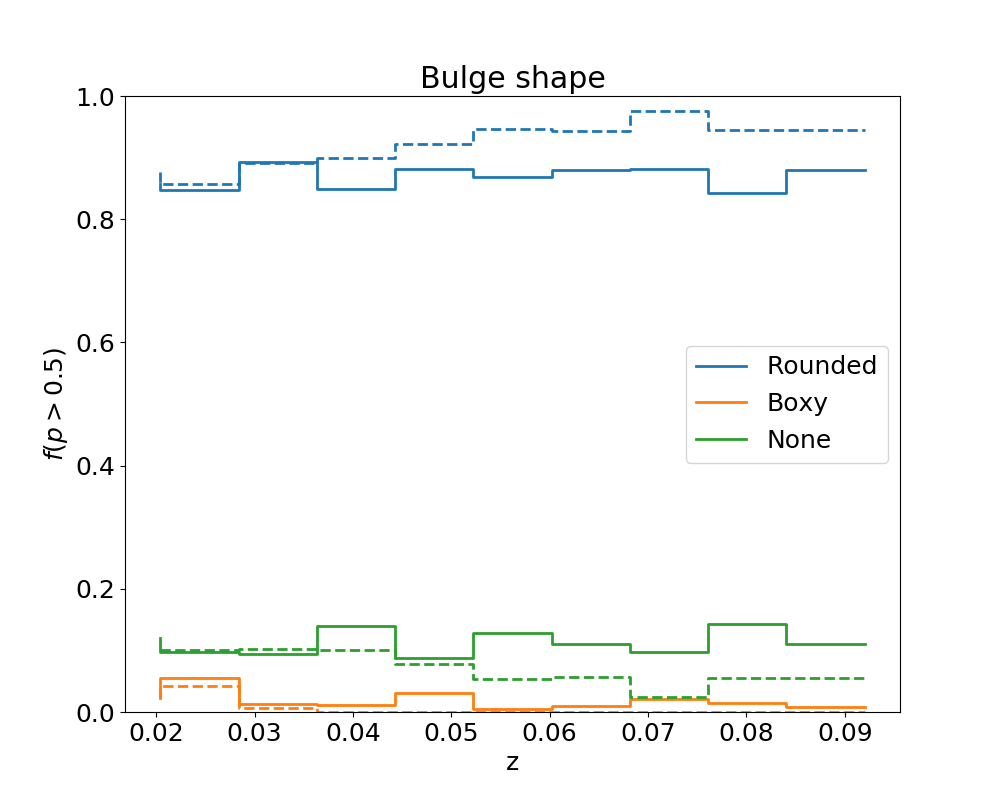

<IPython.core.display.Javascript object>


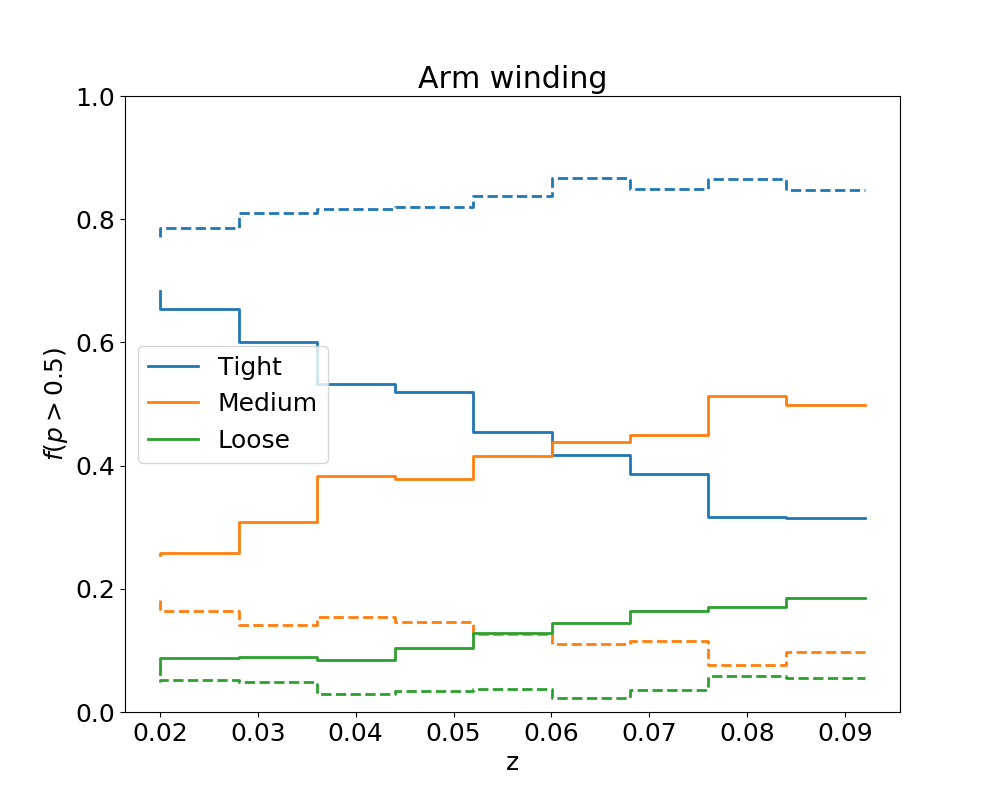

<IPython.core.display.Javascript object>


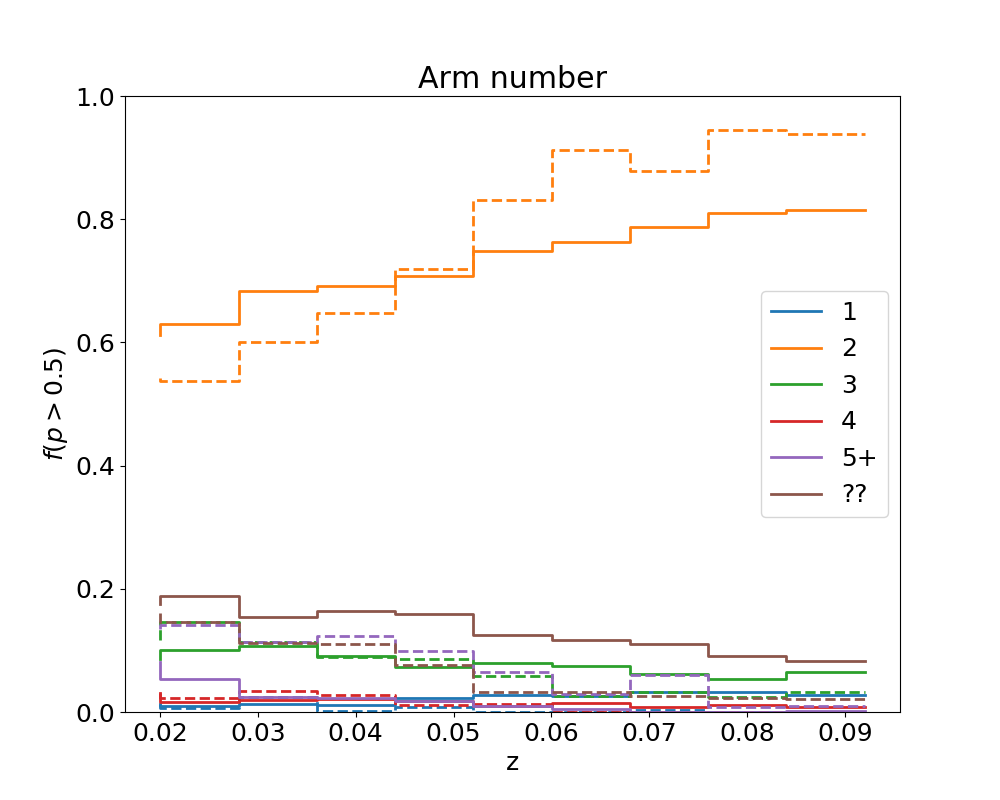

In [3]:
import copy
figure_number = 1

for question, values in dictionaries.questions.items():
    fig = plt.figure(figure_number)
    p_q = 1
    if values['pre_questions'] is not None:
        for q_, a_ in zip(values['pre_questions'], values['pre_answers']):
            p_q *= data['{0}_{1}_weight_fraction'.format(q_,a_)]
    N_q = data['{0}_weight'.format(question)]
    sample_ok = (p_q > 0.5) & (N_q >= 5) & volume_limit
    b_orig_storage = []
    x_orig_storage = []
    b_deb_storage = []
    x_deb_storage = []
    for a_key, a_label in zip(values['answers'], values['answerlabels']):
        fraction_column = '{0}_{1}_weight_fraction'.format(question, a_key)
        debias_column = '{0}_{1}_debiased'.format(question, a_key)
        x_orig, b_orig, _ = binned_statistic(data.z[sample_ok], data[fraction_column][sample_ok] > 0.5, bins=10, statistic='sum')
        x_deb, b_deb, _ = binned_statistic(data.z[sample_ok], data[debias_column][sample_ok] > 0.5, bins=10, statistic='sum')
        x_orig_storage.append(copy.deepcopy(x_orig))
        b_orig_storage.append(copy.deepcopy(b_orig))
        x_deb_storage.append(copy.deepcopy(x_deb))
        b_deb_storage.append(copy.deepcopy(b_deb))
    x_orig_total = np.array(x_orig_storage).sum(axis=0)
    x_deb_total = np.array(x_deb_storage).sum(axis=0)
    color_counter = 0
    for adx, a_label in enumerate(values['answerlabels']):
        b_orig = b_orig_storage[adx]
        x_orig = x_orig_storage[adx] / x_orig_total
        plt.plot(b_orig[:-1], x_orig, color='C{0}'.format(color_counter), drawstyle='steps', ls='-', lw=2, label=a_label)
        b_deb = b_deb_storage[adx]
        x_deb = x_deb_storage[adx] / x_deb_total
        plt.plot(b_deb[:-1], x_deb, color='C{0}'.format(color_counter), drawstyle='steps', ls='--', lw=2)
        color_counter += 1
    plt.legend()
    plt.ylim(0, 1)
    plt.xlabel('z')
    plt.ylabel(r'$f(p>0.5)$')
    plt.title(values['questionlabel'])
    # plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/{0}_debiased_volume_limit_bin.png'.format(question))
    figure_number += 1


<IPython.core.display.Javascript object>


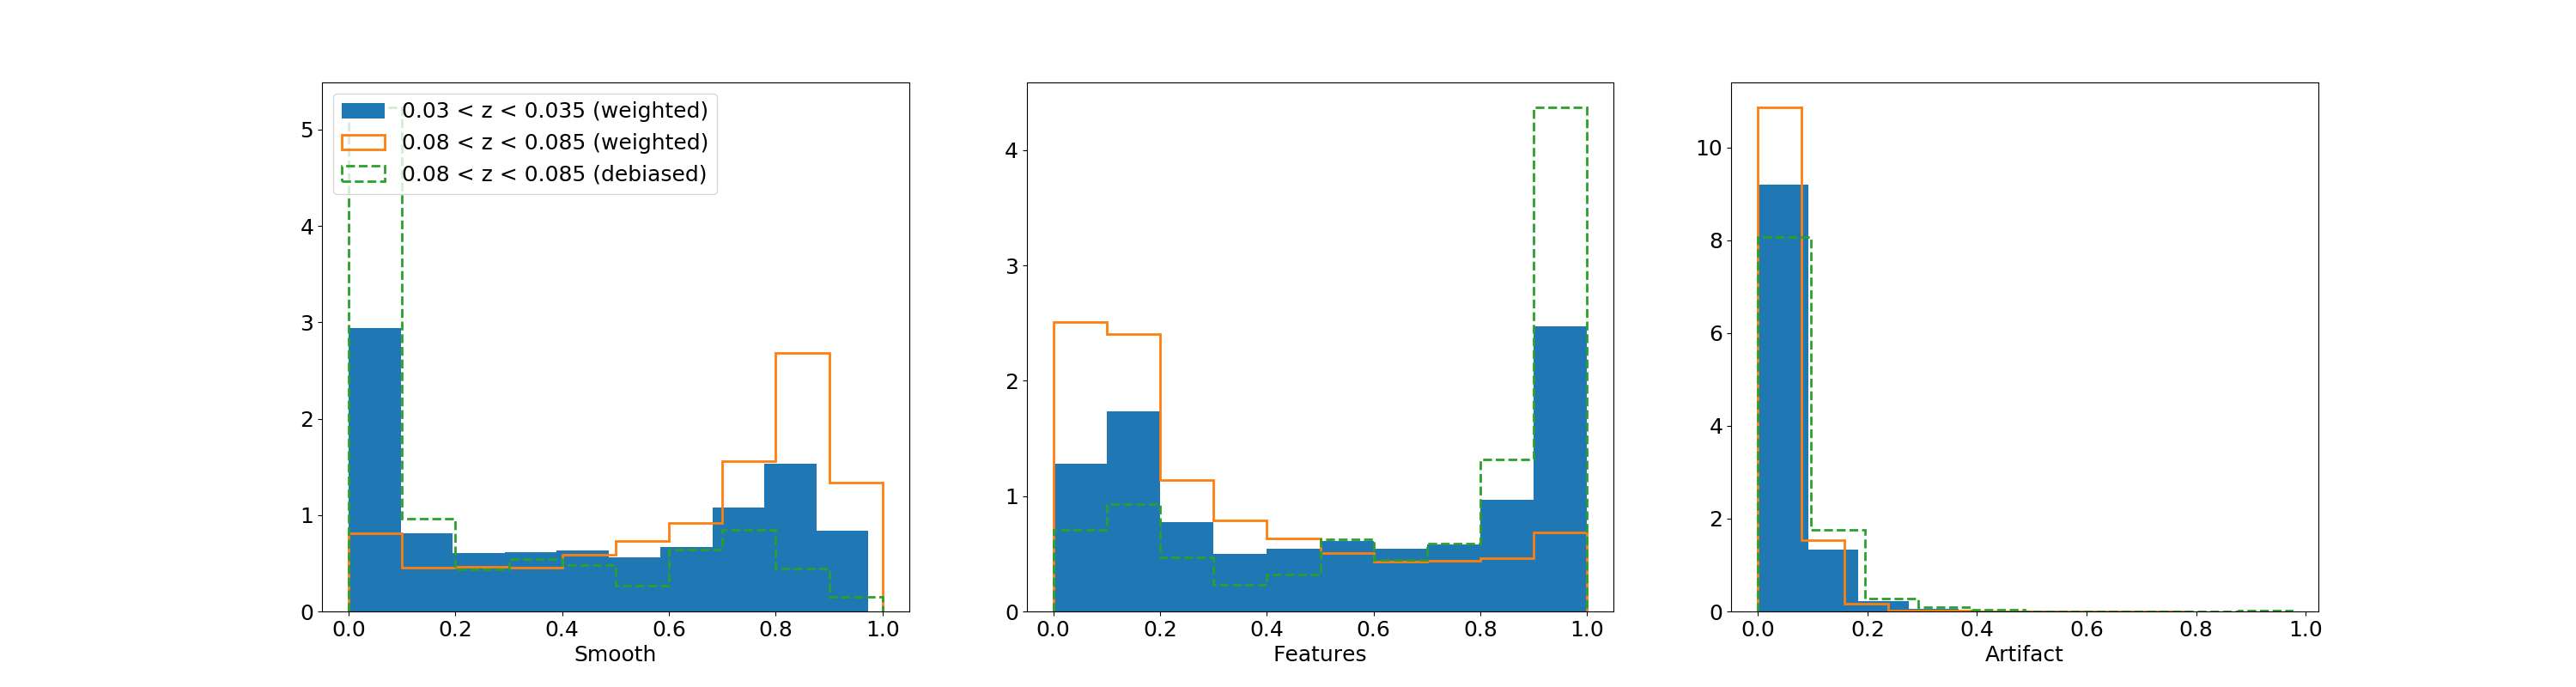

Text(0.5,0,'Artifact')

In [4]:
low_z = (data.z > 0.03) & (data.z <= 0.035) & volume_limit
high_z = (data.z > 0.08) & (data.z <= 0.085) & volume_limit

plt.figure(11, figsize=(30, 8))
plt.subplot(131)
plt.hist(data.t01_smooth_or_features_a01_smooth_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a01_smooth_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a01_smooth_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.legend(loc=2)
plt.xlabel('Smooth')

plt.subplot(132)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.xlabel('Features')

plt.subplot(133)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.xlabel('Artifact')

# plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/T01_z_hist_volume_limit_bin.png')

<IPython.core.display.Javascript object>


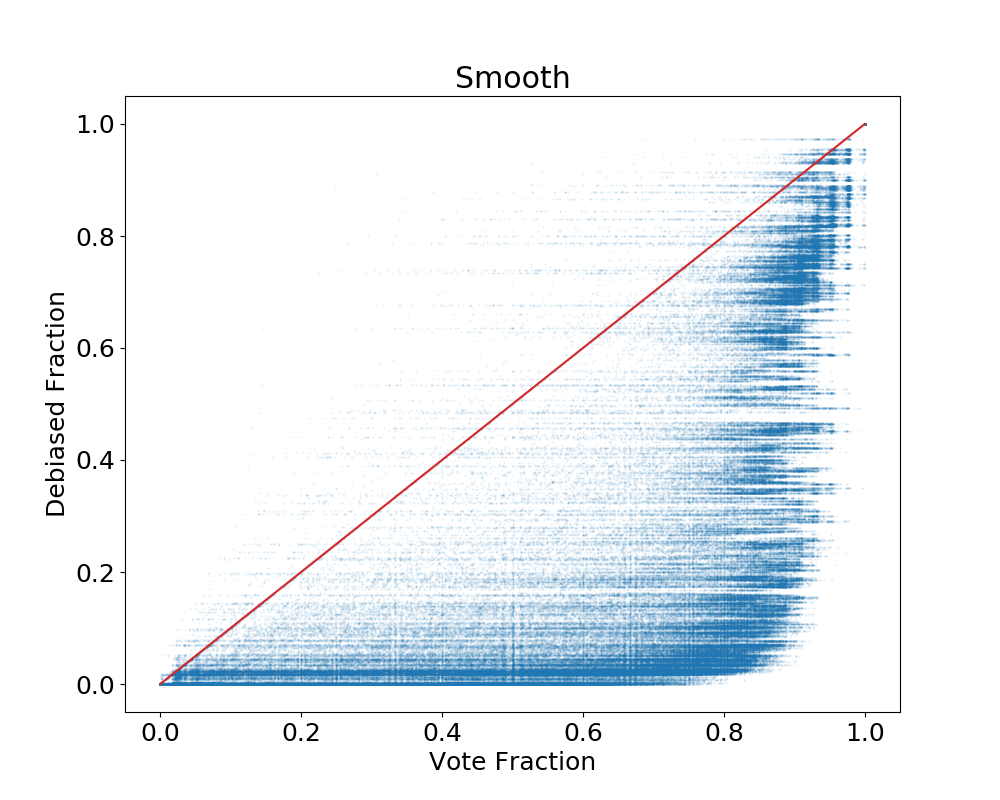

Text(0.5,1,'Smooth')

In [6]:
plt.figure()
plt.plot(data.t01_smooth_or_features_a01_smooth_weight_fraction, data.t01_smooth_or_features_a01_smooth_debiased, '.', ms=1, alpha=0.1)
plt.plot([0, 1], [0, 1], 'C3')
plt.xlabel('Vote Fraction')
plt.ylabel('Debiased Fraction')
plt.title('Smooth')
# plt.savefig('/volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/T01_smooth_vote_vs_debiased_bin.png')

<IPython.core.display.Javascript object>


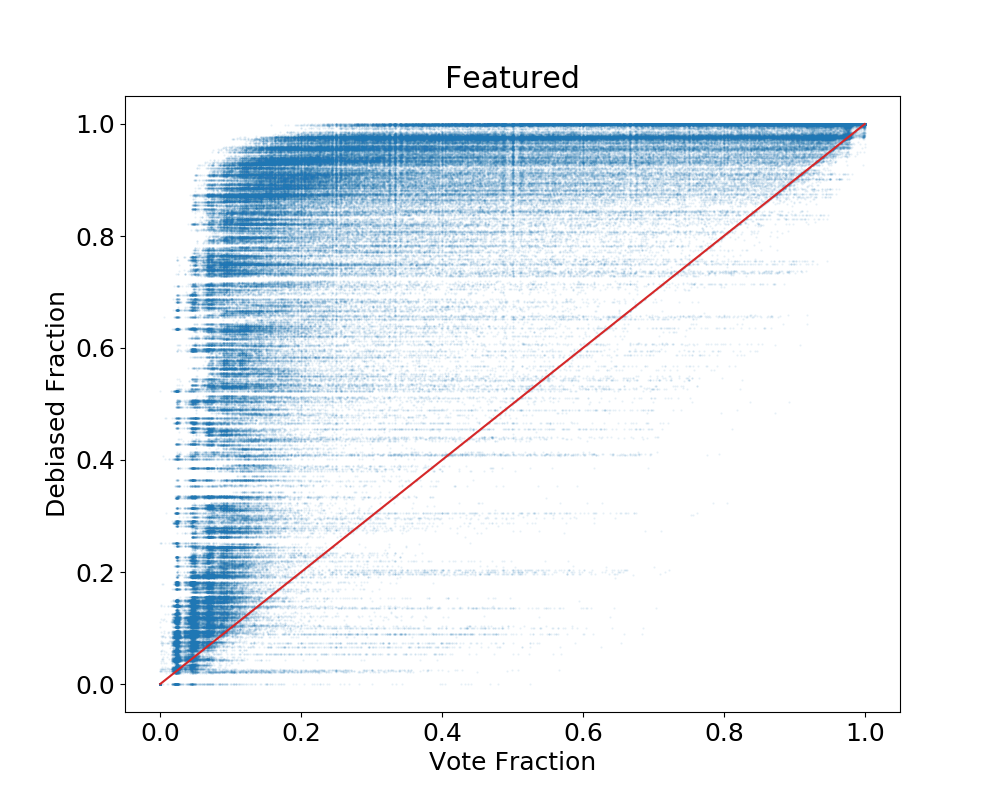

Text(0.5,1,'Featured')

In [5]:
plt.figure()
plt.plot(data.t01_smooth_or_features_a02_features_or_disk_weight_fraction, data.t01_smooth_or_features_a02_features_or_disk_debiased, '.', ms=1, alpha=0.1)
plt.plot([0, 1], [0, 1], 'C3')
plt.xlabel('Vote Fraction')
plt.ylabel('Debiased Fraction')
plt.title('Featured')
# plt.savefig('/volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/T01_freatured_vote_vs_debiased_bin.png')